   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

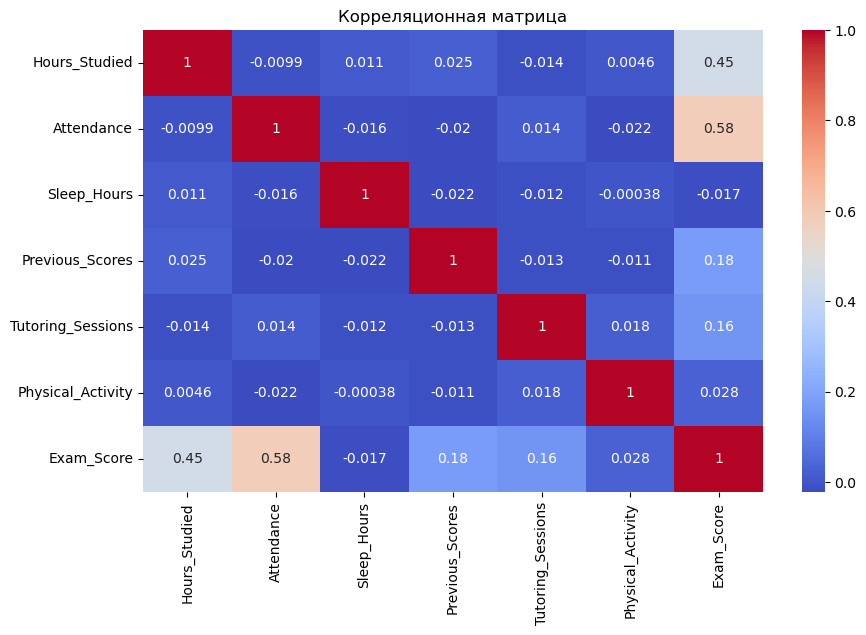

Logistic Regression Accuracy: 0.9984871406959153
Random Forest Accuracy: 0.9924357034795764
SVM Accuracy: 0.9916792738275341

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      1322
   macro avg       0.95      0.95      0.95      1322
weighted avg       1.00      1.00      1.00      1322

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.99      1.00      1.00      1311

    accuracy                           0.99      1322
   macro avg       1.00      0.55      0.58      1322
weighted avg       0.99      0.99      0.99      1322

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
 

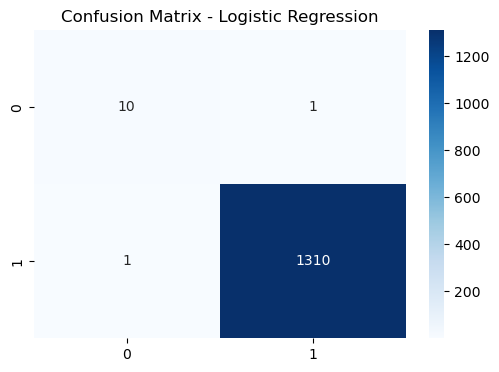

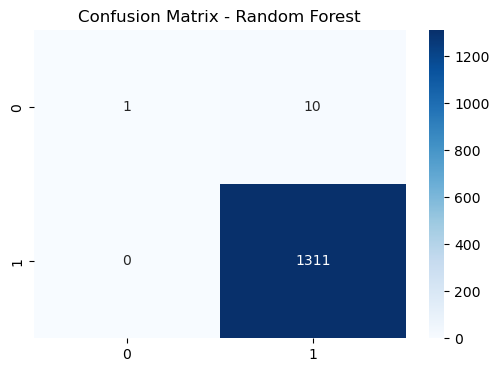

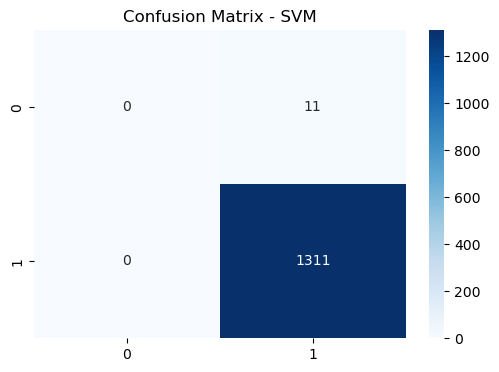

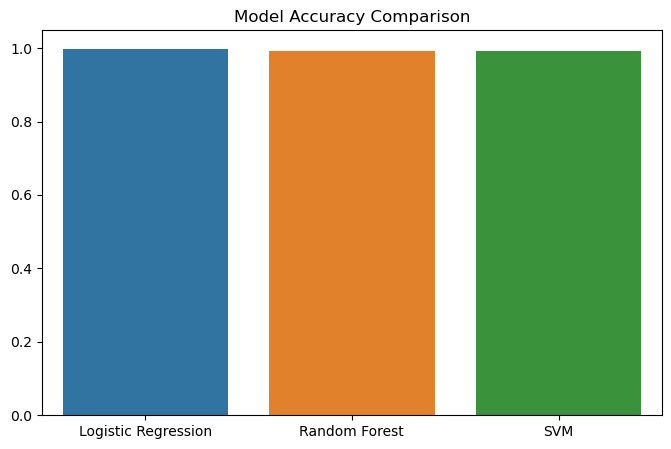

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 1. Загрузка данных
data = pd.read_csv("StudentPerformanceFactors.csv")

# 2. Проведение EDA
# Просмотр первых строк
print(data.head())

# Основная информация о данных
print(data.info())

# Пропуски в данных
print("Пропуски в данных:\n", data.isnull().sum())

# Корреляционная матрица для числовых признаков
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# 3. Векторизация категориальных данных
# Преобразование категориальных данных в числовой формат
categorical_columns = data.select_dtypes(include=['object']).columns

# One-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 4. Подготовка данных для классификации
X = data.drop("Exam_Score", axis=1)  # Все признаки, кроме целевого
y = data["Exam_Score"]  # Целевой признак

# Бинаризация целевого признака (классификация: сдал/не сдал)
y = (y >= 60).astype(int)  # Предположим, 60 баллов - это проходной порог

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Обучение моделей

# Логистическая регрессия
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# 6. Оценка моделей
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Выводы
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# 7. Графики
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

# График метрики точности для каждой модели
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.show()


In [26]:
# 1. Загрузка данных
data = pd.read_csv("StudentPerformanceFactors.csv")

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

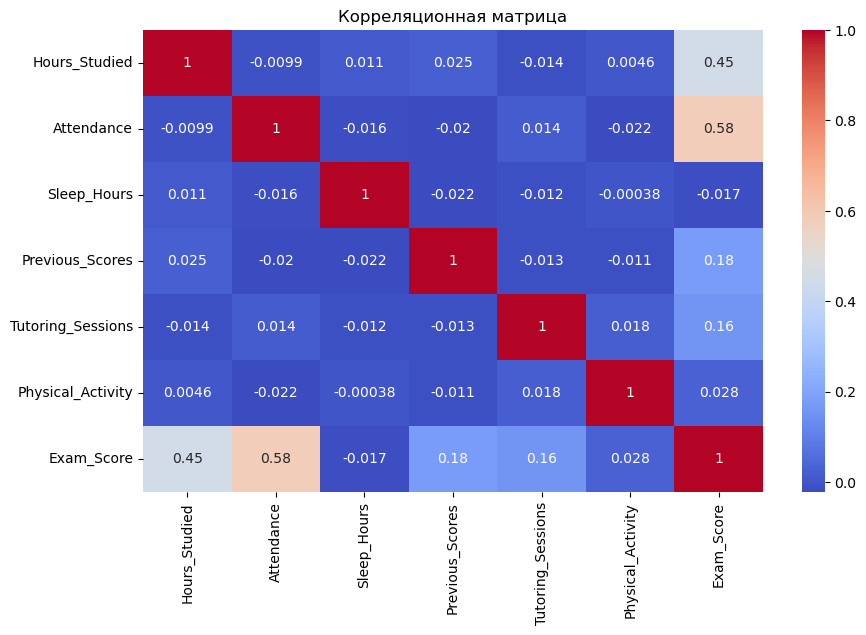

In [28]:
# 2. Проведение EDA
# Просмотр первых строк
print(data.head())

# Основная информация о данных
print(data.info())

# Пропуски в данных
print("Пропуски в данных:\n", data.isnull().sum())

# Корреляционная матрица для числовых признаков
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [29]:
# 3. Векторизация категориальных данных
# Преобразование категориальных данных в числовой формат
categorical_columns = data.select_dtypes(include=['object']).columns

# One-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [30]:
# 4. Подготовка данных для классификации
X = data.drop("Exam_Score", axis=1)  # Все признаки, кроме целевого
y = data["Exam_Score"]  # Целевой признак

# Бинаризация целевого признака (классификация: сдал/не сдал)
y = (y >= 60).astype(int)  # Предположим, 60 баллов - это проходной порог

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)